In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline


In [2]:
base = [Image.open(f's{pasta}/{fig}.pgm').convert('L')  for pasta in range(1,41) for fig in range(1,11)]

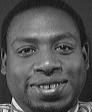

In [3]:
input_img = Image.open(f's22/8.pgm').convert('L')
input_img


In [4]:
M=len(base)
M

400

In [5]:
X = np.array([base[i].getdata() for i in range(M)])

In [6]:
X.shape

(400, 10304)

In [7]:
media = np.mean(X,0)
phi=X-media

In [8]:
media

array([85.6875, 85.7975, 86.145 , ..., 77.4625, 76.4575, 75.6475])

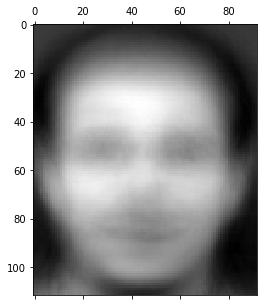

In [9]:
display(plt.matshow(np.reshape(media, (112,92)), cmap='gray'))

In [10]:
phi.shape

(400, 10304)

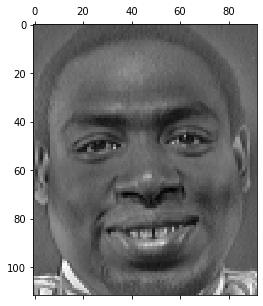

In [40]:
display(plt.matshow(np.reshape(phi[217], (112,92)), cmap='gray'))

In [12]:
e_faces, sigma, v = np.linalg.svd(phi.transpose(), full_matrices=False)

In [13]:
val_prop=sigma*sigma

In [14]:
traco=sum(val_prop)

In [15]:
confianca_alvo=0.9
k=0
confianca=0
while confianca < confianca_alvo:
    confianca= confianca+val_prop[k]/traco
    k+=1
k, confianca

(107, 0.9009006459895261)

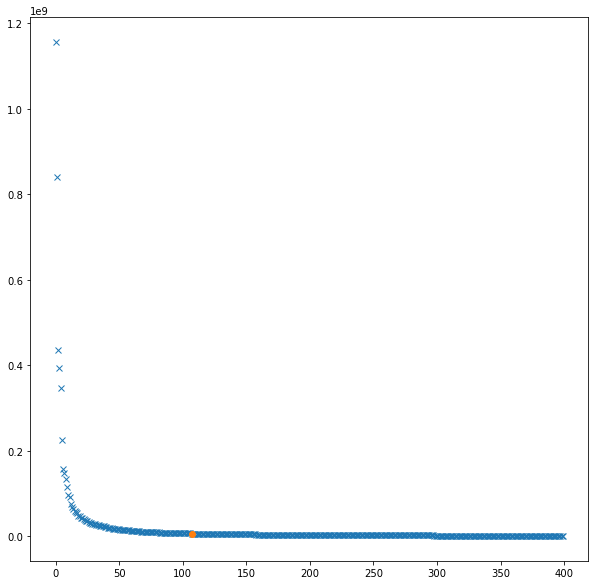

In [16]:
plt.figure(figsize=(10,10))
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(k, val_prop[k], 'o')
plt.show()

In [17]:
coef_proj = [np.dot(phi[i], e_faces) for i in range(M)]

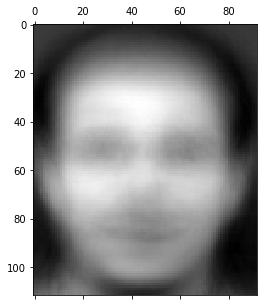

In [18]:
display(plt.matshow(np.reshape(media, (112,92)), cmap='gray'))

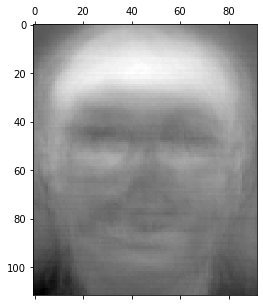

In [19]:
display(plt.matshow(np.reshape(e_faces.T[0], (112,92)), cmap='gray'))

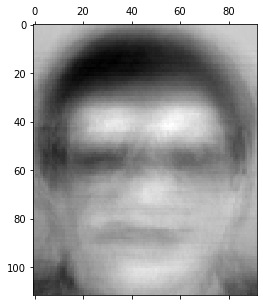

In [20]:
display(plt.matshow(np.reshape(e_faces.T[1], (112,92)), cmap='gray'))

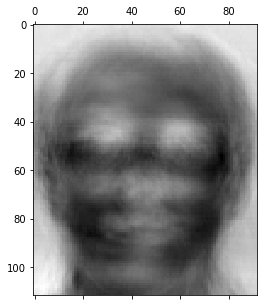

In [21]:
display(plt.matshow(np.reshape(e_faces.T[2], (112,92)), cmap='gray'))

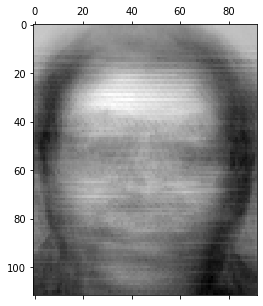

In [22]:
display(plt.matshow(np.reshape(e_faces.T[3], (112,92)), cmap='gray'))

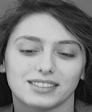

In [23]:
input_img = Image.open(f'3.pgm').convert('L')
input_img

In [24]:
gamma = np.array(input_img.getdata())

In [25]:
test_phi = gamma - media

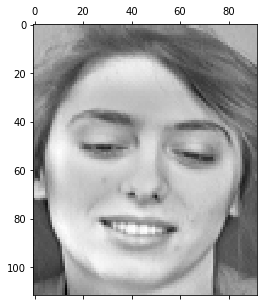

In [35]:
display(plt.matshow(np.reshape(test_phi, (112,92)), cmap='gray'))

In [26]:
test_coef_proj = np.dot(test_phi, e_faces)

In [27]:
test_coef_proj.shape

(400,)

In [28]:
dist = [np.linalg.norm(coef_proj[i] - test_coef_proj) for i in range(M)]
d_min = np.min(dist)

In [29]:
len(dist)

400

In [30]:
d_min

1855.7081589851891

In [31]:
np.argmin(dist)

75

In [32]:
limite=7000
if d_min < limite:
    pasta = np.floor(np.argmin(dist)/10)+1
    print('Pasta s'f'{pasta}\ndist={d_min}')
else:
    print('Falhou no reconhecimento.')


Pasta s8.0
dist=1855.7081589851891


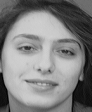

In [33]:
Image.open(f's8/3.pgm').convert('L')

In [34]:
def identify(img):
    gamma = np.array(img.getdata())
    test_phi = gamma - media
    test_coef_proj = np.dot(test_phi, e_faces[:,0:2])
    return test_coef_proj

Text(0, 0.5, 'Eigenface 2')

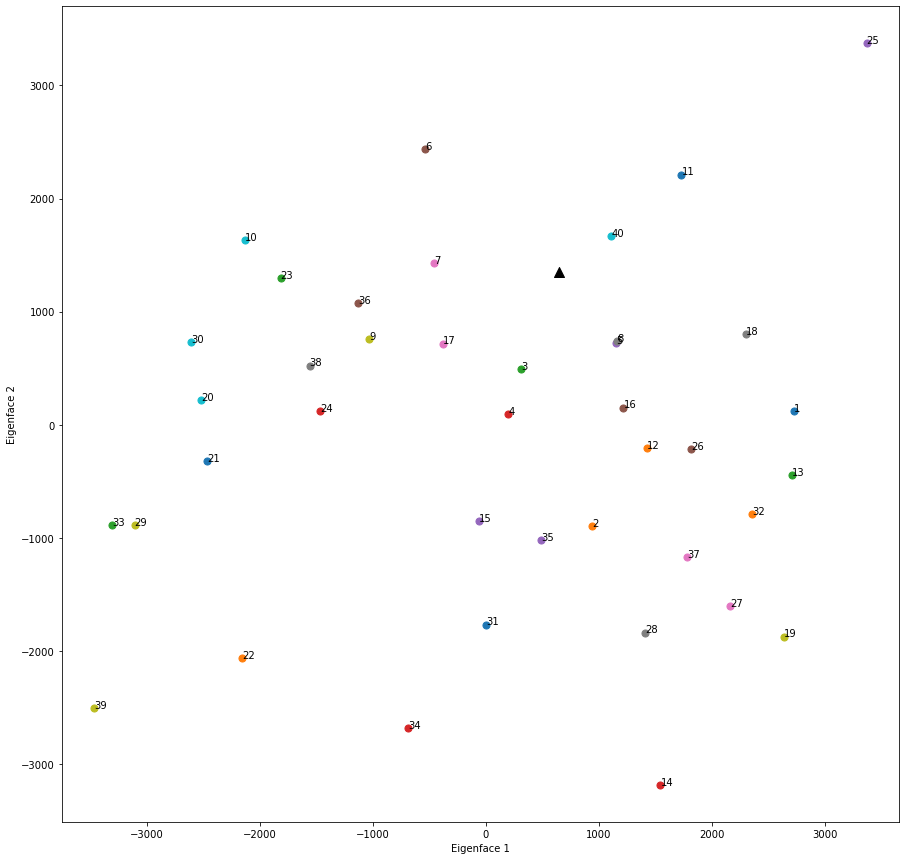

In [36]:
plt.figure(figsize=(15,15))
plt.axis('equal')
for pasta in range(1,41):
    imagens = [Image.open(f's{pasta}/{i}.pgm').convert('L') for i in range(3,4)]
    x, y = np.array([identify(pic) for pic in imagens]).T
    plt.scatter(x,y, s=50)
    plt.text(x, y, pasta)
plt.scatter(*identify(input_img), label='Input image', marker='^', c='k', s=100)
plt.xlabel('Eigenface 1')
plt.ylabel('Eigenface 2')

In [37]:
np.linalg.norm(coef_proj[75] - test_coef_proj)

1855.7081589851891

In [38]:
np.linalg.norm(coef_proj[248] - test_coef_proj)

4844.574777142385

$d(x, y)=\sum \frac{1}{\lambda_i}(x_i-y_i)^2$